# Which model will be the best for predicting school closure?

Given that the target variable is binary/boolean, a logistic regression model is appropriate. Other potential models include a Decision Tree and a Random Forest ensemble.

In [1]:
# Set up the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [2]:
# Upload the data
X_train = pd.read_csv('../data/processed/X_train.csv', index_col=0)
X_test = pd.read_csv('../data/processed/X_test.csv', index_col=0)
y_train = pd.read_csv('../data/processed/y_train.csv', index_col=0)
y_test = pd.read_csv('../data/processed/y_test.csv', index_col=0)

In [3]:
X_train.drop('Year', axis=1, inplace=True)
X_test.drop('Year', axis=1, inplace=True)

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7140 entries, 7690 to 7821
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NUMBRANCH          7140 non-null   float64
 1   UGDS               7140 non-null   float64
 2   TUITFTE            7140 non-null   float64
 3   INEXPFTE           7140 non-null   float64
 4   PFTFAC             7140 non-null   float64
 5   UG25abv            7140 non-null   float64
 6   COMP_ORIG_YR4_RT   7140 non-null   float64
 7   WDRAW_ORIG_YR4_RT  7140 non-null   float64
 8   ENRL_ORIG_YR4_RT   7140 non-null   float64
 9   DEBT_MDN           7140 non-null   float64
 10  Cost               7140 non-null   float64
 11  Complete           7140 non-null   float64
 12  RetentionFT        7140 non-null   float64
 13  PREDDEG_1          7140 non-null   float64
 14  PREDDEG_2          7140 non-null   float64
 15  PREDDEG_3          7140 non-null   float64
 16  PREDDEG_4          71

In [5]:
X_train.head()

,NUMBRANCH,UGDS,TUITFTE,INEXPFTE,PFTFAC,UG25abv,COMP_ORIG_YR4_RT,WDRAW_ORIG_YR4_RT,ENRL_ORIG_YR4_RT,DEBT_MDN,Cost,Complete,RetentionFT,PREDDEG_1,PREDDEG_2,PREDDEG_3,PREDDEG_4,CONTROL_2,CONTROL_3
7690,0.856503,-0.012148,0.682703,-0.234495,-0.731771,-0.781044,-1.104111,2.275780,1.867644,-0.321992,1.142838,-1.185604,-0.449087,-0.967964,-0.464939,1.831735,-0.198055,-0.535028,0.892416
6829,-0.096734,-0.367243,18.245988,4.278136,-0.211820,0.446370,0.784863,-0.008707,-0.648526,-0.321992,-0.088419,1.099607,0.734786,1.033096,-0.464939,-0.545931,-0.198055,-0.535028,0.892416
123,-0.313379,-0.387534,3.779084,0.933122,0.582513,0.882587,-2.156321,-2.045832,-0.648526,-0.321992,-0.746327,-0.435412,0.298753,1.033096,-0.464939,-0.545931,-0.198055,1.869062,-1.120553
2423,-0.313379,-0.174900,-1.073925,-0.086166,0.081356,-0.194711,-1.556657,0.745435,1.057130,-1.780938,-1.385571,-1.031426,-0.927814,-0.967964,2.150822,-0.545931,-0.198055,-0.535028,-1.120553
2438,-0.313379,-0.136643,-0.818800,0.034198,2.169510,-1.129842,-1.556657,0.745435,1.057130,-0.893850,-1.223753,-1.292050,-0.656223,-0.967964,2.150822,-0.545931,-0.198055,-0.535028,-1.120553


In [6]:
y_train.head()

,CURROPER
7690,True
6829,True
123,False
2423,True
2438,True


In [7]:
y = y_train.CURROPER.ravel()

# Modeling
## Logistic Regression

Hyperparameters to tune:
- C = inverse of regularization strength; smaller values are stronger regularization, may lead to underfit model; large C may lead to overfitting
- l1_ratio = 0 == L2 penalty; 1 == L1 penalty

In [8]:
# Import and instantiate model
from sklearn.linear_model import LogisticRegression

In [9]:
# Hyperparameter search
from sklearn.model_selection import RandomizedSearchCV

c_grid = [0.001, 0.01, 0.1, 1, 10]
l1_ratio_grid = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]
max_iter_grid = [100, 500, 1000, 1500, 2000]

lr_grid = {'C':c_grid, 'l1_ratio':l1_ratio_grid,'max_iter':max_iter_grid}

In [10]:
logreg = LogisticRegression(solver = 'saga', penalty = 'elasticnet', random_state=21)
logreg_cv = RandomizedSearchCV(logreg, lr_grid, cv=5, random_state=21)

In [11]:
start= time.time()
logreg_cv.fit(X_train, y)
end = time.time()
print('GridSearch Time:', end-start)

GridSearch Time: 5.748245000839233


In [12]:
print("Best params: " , logreg_cv.best_params_)
print("Best score: ", logreg_cv.best_score_)

Best params:  {'max_iter': 500, 'l1_ratio': 0.75, 'C': 10}
Best score:  0.7595238095238095


### Grid Results
- Max_iter : 500
- L1_ratio : 0.75
- C : 10  -- caution - too high a value may lead to overfitting.

### Run the model with the best parameters (based on multiple runs, and theoretical considerations)

In [13]:
modelLR = LogisticRegression(C = 1, penalty = 'elasticnet', l1_ratio=0.75, max_iter = 500, solver = 'saga', random_state=21)
start = time.time()
modelLR.fit(X_train, y)
end = time.time()
print("Fit time = ", end - start)

start = time.time()
lr_pred = modelLR.predict(X_test)
end = time.time()
print("Predict time = ", end - start)

lr_pred_prob = modelLR.predict_proba(X_test)[:, 1]

Fit time =  0.2380080223083496
Predict time =  0.0018072128295898438


### Evaluate the model

In [14]:
# Evaluate model
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score
print(confusion_matrix(y_test, lr_pred))

[[ 217  611]
 [ 122 2110]]


In [15]:
# Classification report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

       False       0.64      0.26      0.37       828
        True       0.78      0.95      0.85      2232

    accuracy                           0.76      3060
   macro avg       0.71      0.60      0.61      3060
weighted avg       0.74      0.76      0.72      3060



In [16]:
lr50_acc = 0.76
lr50_recall_neg = 0.26
lr50_precision_neg = 0.64
lr50_recall_pos = 0.95
lr50_precision_pos = 0.78

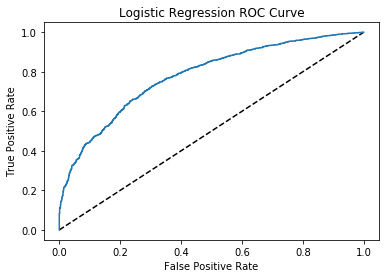

In [17]:
# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, lr_pred_prob)

plt.plot( [0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [18]:
print("AUC: ", roc_auc_score(y_test, lr_pred_prob))

AUC:  0.779424066715149


In [19]:
# Coefficients
coeffic = modelLR.coef_
coeffic = coeffic[0]
labels = [i for i in X_train.columns]
numLab = len(labels)

In [20]:
coeffic = pd.DataFrame(coeffic, index=labels)
coeffic.columns= ['Coefficient']
coeffic.sort_values(by='Coefficient', inplace=True, ascending=False)
coeffic.head()

,Coefficient
UGDS,0.980956
PREDDEG_3,0.809773
PREDDEG_2,0.295676
TUITFTE,0.254398
NUMBRANCH,0.254007


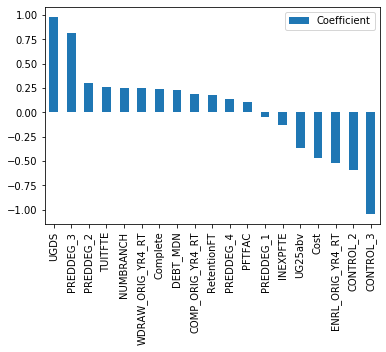

In [21]:
coeffic.plot.bar(y='Coefficient')
plt.xticks(range(0, numLab), labels=coeffic.index, rotation='vertical')
plt.show()

### Coefficient comments
Large positive values - an increase in this variable leads to a higher probability that the school will be open
- UGDS = Undergraduate enrollment - increasing enrollment leads to a higher probability that a school will be open. This seems to be the most important predictor, but it's worth checking how many values were imputed.
- PREDDEG_3 = Categorical variable, indicates primarily bachelor's granting institutions.
- PREDDEG_2 = Categorical variable, indicates primarily associate's granting institutions.

Large negative coefficient values
- Control3 = Categorical variable, private for-profit schools are more likely to be closed
- Control2 = Categorical variable, private nonprofit schools are slightly likely to be closed

## Explore different thresholds for assigning categories to result categories

The default threshold is 50%, but adjusting the threshold will adjust the number schools assigned to each category, and thus change the model evaluation and metrics.

In [22]:
# Calculate and record accuracy metrics for various threshold values
threshold = []
accurate=[]
balance_acc = []
pred_proba = []

for thresh in range(50, 100, 5):
    new_pred = []
    for i in range(0, len(lr_pred_prob)):
        # print(len(dt_pred_prob))
        new_pred.append(lr_pred_prob[i] > (thresh / 100.0))
    # print(new_pred)
    accurate.append(accuracy_score(y_test, new_pred))
    balance_acc.append(balanced_accuracy_score(y_test, new_pred))
    threshold.append(thresh)
    pred_proba.append(new_pred)

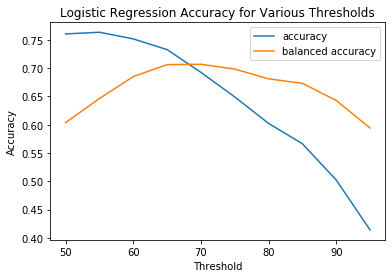

<Figure size 432x288 with 0 Axes>

In [23]:
rate = pd.DataFrame({'threshold':pd.Series(threshold),
                     'accuracy':pd.Series(accurate),
                     'balance_acc':pd.Series(balance_acc)})

plt.plot('threshold', 'accuracy', data=rate, label='accuracy')
plt.plot('threshold', 'balance_acc', data=rate, label='balanced accuracy')
#plt.vlines(6, 0.895, 0.915)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy for Various Thresholds')
plt.legend()
plt.show()
plt.savefig('../figures/LogRegThreshold.png')

In [24]:
print("Balance Accuracy: ", max(balance_acc))
idx = balance_acc.index(max(balance_acc))
print("Threshold: ", threshold[idx])

Balance Accuracy:  0.7067749727286894
Threshold:  70


In [25]:
pred70 = pred_proba[idx]
print(confusion_matrix(y_test, pred70))

[[ 611  217]
 [ 724 1508]]


In [26]:
print(classification_report(y_test, pred70))

              precision    recall  f1-score   support

       False       0.46      0.74      0.56       828
        True       0.87      0.68      0.76      2232

    accuracy                           0.69      3060
   macro avg       0.67      0.71      0.66      3060
weighted avg       0.76      0.69      0.71      3060



In [27]:
lr70_acc = 0.69
lr70_recall_neg = 0.74
lr70_precision_neg = 0.46
lr70_recall_pos = 0.68
lr70_precision_pos = 0.87

Using a threshold of 70 results in the highest balanced accuracy of 70.7%, and better recall and precision for the negative class, as the expense of the positive class. However, we should be able to do better overall using other types of models and/or resampling the minority class.

## Decision Tree
### Explore just the criterion and max_depth features, leaving the other arguments as the default. Plot the accuracy of different tree depths using both criterion measures.
Code modified from https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
from sklearn import metrics
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1, 31):
    gtree = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=21)
    gtree.fit(X_train, y_train)
    gpredict = gtree.predict(X_test)
    acc_gini.append(metrics.accuracy_score(y_test, gpredict))
    ##
    etree = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=21)
    etree.fit(X_train, y_train)
    epredict = etree.predict(X_test)
    acc_entropy.append(metrics.accuracy_score(y_test, epredict))
    ##
    max_depth.append(i)

In [30]:
gini_max = max(acc_gini)
gini_idx = acc_gini.index(gini_max)
entropy_max = max(acc_entropy)
entropy_idx = acc_entropy.index(entropy_max)

if gini_max > entropy_max:
    depth = max_depth[gini_idx]
    crit = 'gini'
else:
    depth = max_depth[entropy_idx]
    crit='entropy'
    
print(depth)

13


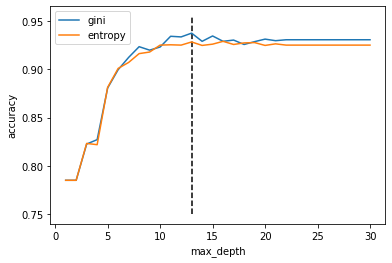

In [31]:
trees = pd.DataFrame({'acc_gini':pd.Series(acc_gini),
                     'acc_entropy':pd.Series(acc_entropy),
                     'max_depth':pd.Series(max_depth)})

plt.plot('max_depth', 'acc_gini', data=trees, label='gini')
plt.plot('max_depth', 'acc_entropy', data=trees, label='entropy')
plt.vlines(depth, 0.75, 0.955, linestyle='--')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [32]:
# Train the decision tree using the identified hyperparameters
modelDT = DecisionTreeClassifier(criterion=crit, max_depth=depth, random_state=21)
modelDT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


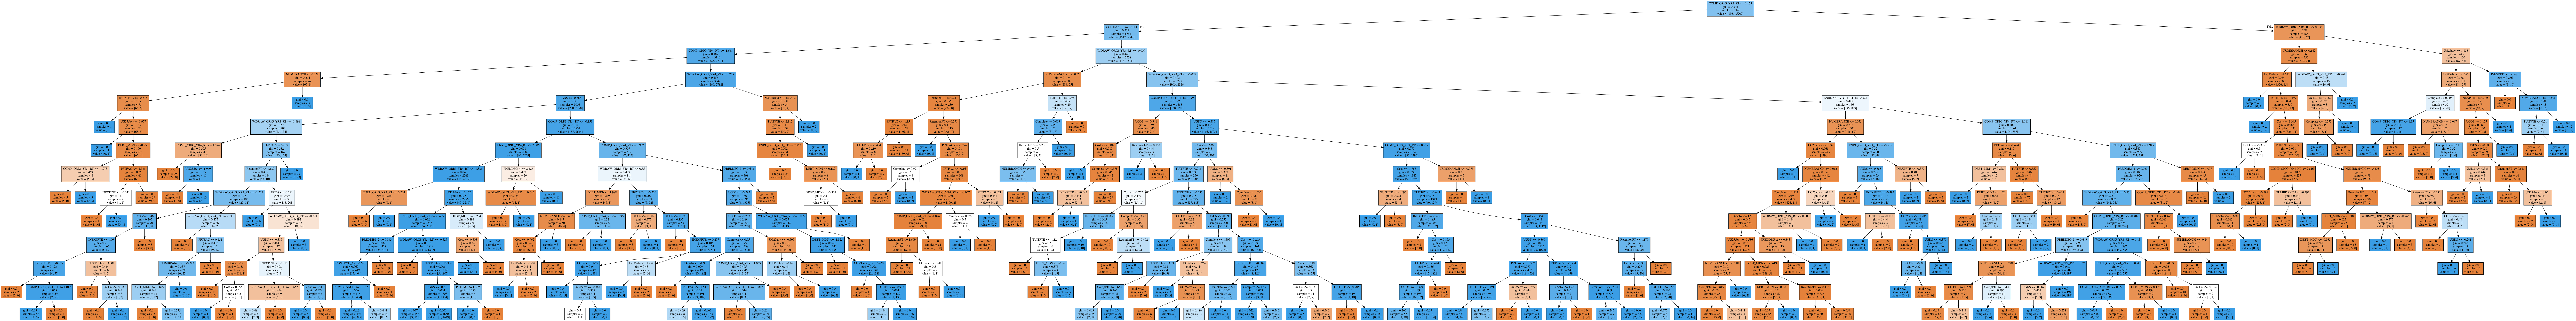

In [33]:
#from sklearn.tree import plot_tree
#plot_tree(modelDT)
# Code from https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(modelDT, out_file=dot_data, filled=True, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [34]:
# from sklearn.tree import plot_tree
# plot_tree(modelDT)

In [35]:
# Use the trained tree to predict the testing data
dt_pred = modelDT.predict(X_test)
dt_pred_prob = modelDT.predict(X_test)

In [36]:
# Run this block for model evaluation 
#from sklearn import metrics
print("Model Metrics")
print("Accuracy:", metrics.accuracy_score(y_test, dt_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test, dt_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test, dt_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test, dt_pred, pos_label = 0))

Model Metrics
Accuracy: 0.9375816993464052
Balanced accuracy: 0.9093521115786193
Precision score for "Yes" 0.9450501526384649
Recall score for "No" 0.8478260869565217


In [37]:
print(confusion_matrix(y_test, dt_pred))

[[ 702  126]
 [  65 2167]]


In [38]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

       False       0.92      0.85      0.88       828
        True       0.95      0.97      0.96      2232

    accuracy                           0.94      3060
   macro avg       0.93      0.91      0.92      3060
weighted avg       0.94      0.94      0.94      3060



In [39]:
dt_acc = 0.94
dt_recall_neg = 0.85
dt_precision_neg = 0.92
dt_recall_pos = 0.97
dt_precision_pos = 0.95

### Try different threshold values for the Decision Tree model results

In [40]:
threshold = []
accurate=[]
balance_acc = []
pred_proba = []

for thresh in range(50, 100, 5):
    new_pred = []
    for i in range(0, len(dt_pred_prob)):
        # print(len(dt_pred_prob))
        new_pred.append(dt_pred_prob[i] > (thresh / 100.0))
    # print(new_pred)
    accurate.append(metrics.accuracy_score(y_test, new_pred))
    balance_acc.append(metrics.balanced_accuracy_score(y_test, new_pred))
    threshold.append(thresh)
    pred_proba.append(new_pred)

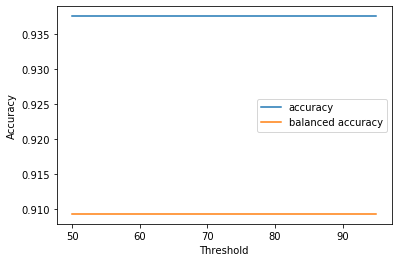

In [41]:
rate = pd.DataFrame({'threshold':pd.Series(threshold),
                     'accuracy':pd.Series(accurate),
                     'balance_acc':pd.Series(balance_acc)})

plt.plot('threshold', 'accuracy', data=rate, label='accuracy')
plt.plot('threshold', 'balance_acc', data=rate, label='balanced accuracy')
#plt.vlines(6, 0.895, 0.915)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
print("Balance Accuracy: ", max(balance_acc))
idx = balance_acc.index(max(balance_acc))
print("Threshold: ", threshold[idx])

Balance Accuracy:  0.9093521115786193
Threshold:  50


It appears that changing the threshold doesn't affect the Decision Tree model outcomes.

## Random Forest Classifier

Hyperparameters:
- number of trees per forest (n_estimators)
- max depth of trees
- impurity criterion method
- number of features per tree (?); 'auto' will use sqrt.

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
n_tree_grid = [50, 75, 100]
crit_grid = ['gini', 'entropy']
max_depth_grid = ['None', 4, 6, 8, 10, 12]

rfc_grid = {'n_estimators':n_tree_grid,
              'criterion': crit_grid, 
              'max_depth':max_depth_grid }

In [45]:
forest = RandomForestClassifier(random_state=21)
start = time.time()
forest_cv = RandomizedSearchCV(forest, rfc_grid, cv=5, random_state=21)
forest_cv.fit(X_train, y)
end = time.time()
print("GridSearch time: ", end-start)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536

GridSearch time:  28.19401717185974


In [46]:
print("Best params: " , forest_cv.best_params_)
print("Best score: ", forest_cv.best_score_)

Best params:  {'n_estimators': 75, 'max_depth': 12, 'criterion': 'entropy'}
Best score:  0.9466386554621848


### Max Depth for Random Forest

In [47]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1, 31):
    gtree = RandomForestClassifier(n_estimators=100, max_features='auto', criterion='gini', max_depth=i, random_state=21)
    gtree.fit(X_train, y)
    gpredict = gtree.predict(X_test)
    acc_gini.append(metrics.accuracy_score(y_test, gpredict))
    ##
    etree = RandomForestClassifier(n_estimators=100, max_features='auto',criterion='entropy', max_depth=i, random_state=21)
    etree.fit(X_train, y)
    epredict = etree.predict(X_test)
    acc_entropy.append(metrics.accuracy_score(y_test, epredict))
    ##
    max_depth.append(i)

In [48]:
gini_max = max(acc_gini)
gini_idx = acc_gini.index(gini_max)
entropy_max = max(acc_entropy)
entropy_idx = acc_entropy.index(entropy_max)

if gini_max > entropy_max:
    depth = max_depth[gini_idx]
    crit = 'gini'
else:
    depth = max_depth[entropy_idx]
    crit='entropy'
    
print(depth)

21


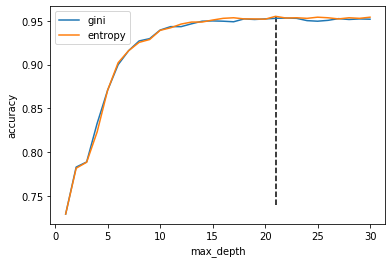

In [49]:
trees = pd.DataFrame({'acc_gini':pd.Series(acc_gini),
                     'acc_entropy':pd.Series(acc_entropy),
                     'max_depth':pd.Series(max_depth)})

plt.plot('max_depth', 'acc_gini', data=trees, label='gini')
plt.plot('max_depth', 'acc_entropy', data=trees, label='entropy')
plt.vlines(depth, 0.74, 0.955, linestyle='--')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [50]:
# Train the Random Forest model using the GridSearch Paramters (above), except for limiting the depth
modelRF = RandomForestClassifier(n_estimators = 75, max_features='auto',
                                max_depth=12, criterion='entropy', random_state=21)
modelRF.fit(X_train, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [51]:
rf_pred = modelRF.predict(X_test)
rf_pred_prob = modelRF.predict_proba(X_test)

In [52]:
print("Random Forest Classifier model")
print("Accuracy:", metrics.accuracy_score(y_test, rf_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test, rf_pred))
print('Precision score for Yes' , metrics.precision_score(y_test, rf_pred, pos_label = 1))
print('Recall score for No' , metrics.recall_score(y_test, rf_pred, pos_label = 0))

Random Forest Classifier model
Accuracy: 0.9483660130718954
Balanced accuracy: 0.915605033504753
Precision score for Yes 0.9446826758147513
Recall score for No 0.8442028985507246


In [53]:
print(confusion_matrix(y_test, rf_pred))

[[ 699  129]
 [  29 2203]]


In [54]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

       False       0.96      0.84      0.90       828
        True       0.94      0.99      0.97      2232

    accuracy                           0.95      3060
   macro avg       0.95      0.92      0.93      3060
weighted avg       0.95      0.95      0.95      3060



In [55]:
rf_acc = 0.95
rf_recall_neg = 0.84
rf_precision_neg = 0.96
rf_recall_pos = 0.99
rf_precision_pos = 0.94

### Explore different thresholds for the Random Forest model

In [56]:
rfthreshold = []
rfaccurate=[]
rfbalance_acc = []
rfpred_proba = []

for thresh in range(50, 100, 5):
    new_pred = []
    for i in range(0, len(rf_pred_prob)):
        # print(len(dt_pred_prob))
        new_pred.append(rf_pred_prob[i, 1] > (thresh / 100.0))
    # print(new_pred)
    rfaccurate.append(metrics.accuracy_score(y_test, new_pred))
    rfbalance_acc.append(metrics.balanced_accuracy_score(y_test, new_pred))
    rfthreshold.append(thresh)
    rfpred_proba.append(new_pred)

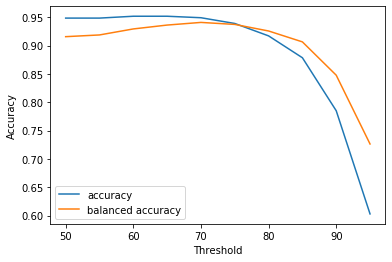

In [57]:
rfrate = pd.DataFrame({'threshold':pd.Series(rfthreshold),
                     'accuracy':pd.Series(rfaccurate),
                     'balance_acc':pd.Series(rfbalance_acc)})

plt.plot('threshold', 'accuracy', data=rfrate, label='accuracy')
plt.plot('threshold', 'balance_acc', data=rfrate, label='balanced accuracy')
#plt.vlines(6, 0.895, 0.915)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
print("Balance Accuracy: ", max(rfbalance_acc))
idx = rfbalance_acc.index(max(rfbalance_acc))
print("Threshold: ", rfthreshold[idx])

Balance Accuracy:  0.9407433380084151
Threshold:  70


In [59]:
rf_pred70 = pred_proba[idx]
print(confusion_matrix(y_test, rf_pred70))

[[ 702  126]
 [  65 2167]]


In [60]:
print(classification_report(y_test, rf_pred70))

              precision    recall  f1-score   support

       False       0.92      0.85      0.88       828
        True       0.95      0.97      0.96      2232

    accuracy                           0.94      3060
   macro avg       0.93      0.91      0.92      3060
weighted avg       0.94      0.94      0.94      3060



In [61]:
rf70_acc = 0.94
rf70_recall_neg = 0.85
rf70_precision_neg = 0.92
rf70_recall_pos = 0.97
rf70_precision_pos = 0.93

# Model comparison
Which model will give the best results for predicting closed schools?

In [62]:
model_eval = {'model':['log_reg 50%', 'log_reg 70%', 'dt', 'rf 50%', 'rf 70%'],
              'accuracy':[lr50_acc,               lr70_acc ,         dt_acc,            rf_acc,             rf70_acc], 
              'recall_neg':[lr50_recall_neg,      lr70_recall_neg ,   dt_recall_neg,     rf_recall_neg,    rf70_recall_neg], 
              'precision_neg':[lr50_precision_neg, lr70_precision_neg, dt_precision_neg, rf_precision_neg,  rf70_precision_neg], 
              'recall_pos':[lr50_recall_pos,       lr70_recall_pos,    dt_recall_pos,    rf_recall_pos,    rf70_recall_pos], 
              'precision_pos':[lr50_precision_pos, lr70_precision_pos, dt_precision_pos, rf_precision_pos, rf70_precision_pos]}

In [63]:
print(len(model_eval['model']))

5


In [64]:
model_eval = pd.DataFrame(model_eval)

In [65]:
model_eval.head()

,model,accuracy,recall_neg,precision_neg,recall_pos,precision_pos
0,log_reg 50%,0.76,0.26,0.64,0.95,0.78
1,log_reg 70%,0.69,0.74,0.46,0.68,0.87
2,dt,0.94,0.85,0.92,0.97,0.95
3,rf 50%,0.95,0.84,0.96,0.99,0.94
4,rf 70%,0.94,0.85,0.92,0.97,0.93


## Which model has the best classification?

Given the unbalanced classes, it is not surprising that the logistic regression model has relatively poor performance on the minority class. While changing the threshold helped improve the negative recall, which improved the balanced accuracy score, it decreased negative precision and positive recall, and overall accuracy. Balancing the data (via resampling) might help improve this model. The benefit of this model is that the coefficients are relatively easy to interpret.

The decision tree model is relatively easy to interpret, and it is easy to determine the optimal depth. The recall and precision for the positive class are fairly good, but the precision and recall are not as good for the negative class.

The random forest model is less easy to interpret, and it is more difficult to determine the optimal depth, since accuracy continues to improve as depth increases - which could lead to overfitting. The precision and recall for the positive class is fairly good, and the precision for the negative class somewhat better than the decision tree for a very deep tree (deeper than the single decision tree model). Using a different threshold could be used to increase the balanced accuracy score, but led to a decrease in all other metrics except negative recall.

For the final model, the decision tree model will for the base for an AdaBoost model. Additionally, the minority class data will be resampled to balance the database before running the model. Different resampling options are explored in the MultipleResamplingMethods notebook. The final model is available in the FinalModel notebook.